## AMATH 584. Homework 5.

Marlin Figgins. December 7, 2020.

# 1. Eigenvalues and Power Iterations

(a) Generate a random, symmetric matrix $\mathbf{A}$ which is $m$ by $m$ where $m=10$. Use the Eigen command in Julia to give you the ground truth eigenvalues and eigenvectors.

(b) Find the largest eigenvalue with the power iteration method. Compare the accuracy of the method as a function of iterations.
    
(c) Find all ten eigenvalues by Rayleigh Quotient iteration and guessing initial ”eigenvectors”. Compare the accuracy of the method as a function of iterations and discuss your initial guesses to find all eigenvalue/eigenvector pairs.

(d) Repeat (b) and (c) with a random matrix that is not symmetric. Be sure to plot the eigenvalue in the complex plane.


In [1]:
using LinearAlgebra, Plots, LaTeXStrings

## 1.a. 

(a) Generate a random, symmetric matrix $\mathbf{A}$ which is $m$ by $m$ where $m=10$. Use the Eigen command in Julia to give you the ground truth eigenvalues and eigenvectors.

In [2]:
m = 10
A = Symmetric(rand(m, m))

10×10 Symmetric{Float64,Array{Float64,2}}:
 0.681417   0.212778  0.272966   0.567368   …  0.231859   0.492889  0.543511
 0.212778   0.308111  0.297191   0.164894      0.944624   0.968557  0.601977
 0.272966   0.297191  0.910353   0.603379      0.925059   0.210729  0.311813
 0.567368   0.164894  0.603379   0.0318285     0.154129   0.964681  0.49816
 0.0110788  0.303164  0.0151315  0.324595      0.0787611  0.957026  0.100875
 0.512699   0.694664  0.0278325  0.939006   …  0.873998   0.572186  0.595285
 0.601389   0.197516  0.529584   0.152624      0.106654   0.80654   0.161255
 0.231859   0.944624  0.925059   0.154129      0.374965   0.778332  0.196388
 0.492889   0.968557  0.210729   0.964681      0.778332   0.063193  0.545189
 0.543511   0.601977  0.311813   0.49816       0.196388   0.545189  0.248296

In [3]:
# Is A symmetric?
issymmetric(A)

true

In [4]:
## Compute eigenvalues and vectors
λ, v = eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -1.6800656427316674
 -0.9191590715194204
 -0.5308755388182542
 -0.33861785431838265
 -0.07828772618704671
  0.31252728946949926
  0.8235198044307106
  1.0217652103428296
  1.3444050361757953
  4.618723034021535
vectors:
10×10 Array{Float64,2}:
 -0.00541724   0.0469432    0.203416   …   0.471126     0.138146    -0.278707
  0.172239     0.618943     0.238357      -0.365902     0.00345357  -0.340606
 -0.254888     0.214767    -0.0270838      0.0353948    0.637532    -0.268789
  0.494321     0.0740851    0.327515       0.103096    -0.0265111   -0.314461
  0.182272     0.00458173  -0.0656192      0.0626194   -0.644795    -0.271121
 -0.353198     0.241431    -0.561608   …  -0.243522    -0.189916    -0.372465
  0.185093     0.0494852   -0.380458       0.609225     0.0728774   -0.245185
  0.347182    -0.539365    -0.0717566     -0.441111     0.2788      -0.338278
 -0.585262    -0.337985     0.471076 

## 1.b. 

(b) Find the largest eigenvalue with the power iteration method. Compare the accuracy of the method as a function of iterations.

In [5]:
function power_iteration(A; N = 10, b0=missing)
    m,n = size(A)
    @assert m == n

    if b0 === missing
        b0 = randn(m) 
        b0 = b0 ./ norm(b0)
    end
    
    b = b0
    
    for k in 1:N
        # Iterate b
        b = A*b
    
        # Normalize b
        b = b ./ norm(b)
    end
    
    # Compute corresponding approximate eigenvalue
    λ_est = b'*A*b
    
    # Return approximate dominant eigenvector and eigenvalue
    return b, λ_est
end

b_PI, λ_est_PI = power_iteration(A);

In [6]:
b_PI

10-element Array{Float64,1}:
 0.278705429041827
 0.34063067895155336
 0.2687478080391873
 0.314532019173911
 0.2711510430600555
 0.3724155186788398
 0.24521093534515612
 0.33832637186535347
 0.41878106942966953
 0.2700950229783341

In [7]:
λ_est_PI

4.618722905173852

In [8]:
function power_iteration_save(A;N = 10, b0=missing)
    
    m,n = size(A)
    @assert m == n
    
    if b0 === missing
        b0 = randn(m) 
        b0 = b0 ./ norm(b0)
    end
    
    b = Matrix{typeof(A[1,1])}(undef, m, N+1)
    
    b[:,1] = b0
    b_temp = b0
    
    for k in 1:N
        # Iterate b
        b_temp = A*b_temp
    
        # Normalize b
        b_temp .= b_temp ./ norm(b_temp)
        
        # Save value
        b[:,k+1] = b_temp
    end
    
    # Compute corresponding approximate eigenvalues
    λ_est = Vector{typeof(A[1,1])}(undef, N+1)
    for k in 1:(N+1)
        λ_est[k] = b[:,k]'*A*b[:,k]
    end
    
    # Return approximate dominant eigenvector and eigenvalue
    return b, λ_est
end

power_iteration_save (generic function with 1 method)

In [9]:
## Iterate and save at each step
b_PI, λ_est_PI = power_iteration_save(A;N = 10);

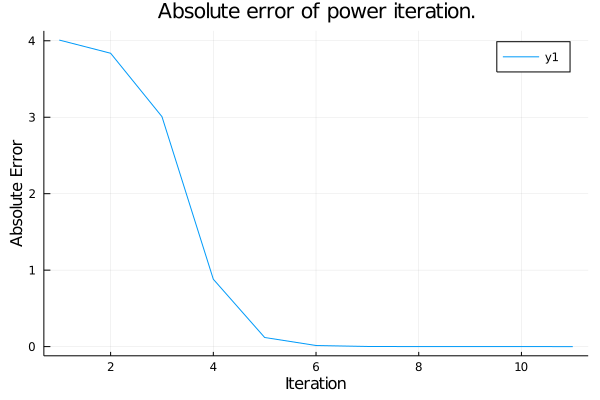

In [10]:
## Plot Accuracy Per Iteration
λ_max = maximum(λ)
error = abs.(λ_est_PI .- λ_max)

plot(error,
    xlabel = "Iteration",
    ylabel = "Absolute Error",
    title = "Absolute error of power iteration.")

# 1.c.

(c) Find all ten eigenvalues by Rayleigh Quotient iteration and guessing initial ”eigenvectors”. Compare the accuracy of the method as a function of iterations and discuss your initial guesses to find all eigenvalue/eigenvector pairs.

In [11]:
function RQ_iteration(A; N = 10, b0=missing)
    m,n = size(A)
    @assert m == n

    if b0 === missing
        b0 = randn(m)
    end
    
    b = b0 ./ norm(b0)
    λ_est = b'*A*b 
    
    for k in 1:N
        # Iterate b
        w = (A - λ_est*I)\b
        
        # Normalize b
        b = w ./ norm(w)
        
        # Compute corresponding approximate eigenvalue
        λ_est = b'*A*b 
         
        # If A - lambda I is singular, then it has converged
        if det(A-λ_est*I) == 0
            break
        end
    end
    
    # Return approximate dominant eigenvector and eigenvalue
    return b, λ_est
end

RQ_iteration (generic function with 1 method)

In [12]:
b_RQ, λ_est_RQ = RQ_iteration(A; N = 10, b0 = ones(m))

([0.2787073213217153, 0.34060609720813184, 0.26878853083800575, 0.31446124884564325, 0.27112059852436143, 0.3724647501460318, 0.2451850777960852, 0.3382784188691512, 0.4188633766267122, 0.27008453469151755], 4.61872303402153)

In [13]:
λ_est_RQ

4.61872303402153

In [14]:
function test_RQ(n_particles, N, b0)
    λ_est_RQ = Matrix{typeof(b0[1,1])}(undef, N, n_particles)
    for particle in 1:n_particles
        for t in 1:N
           b_RQ, λ_est_RQ[t, particle] = RQ_iteration(A; N = t, b0 = b0[:,particle])
        end
    end
    return λ_est_RQ
end

test_RQ (generic function with 1 method)

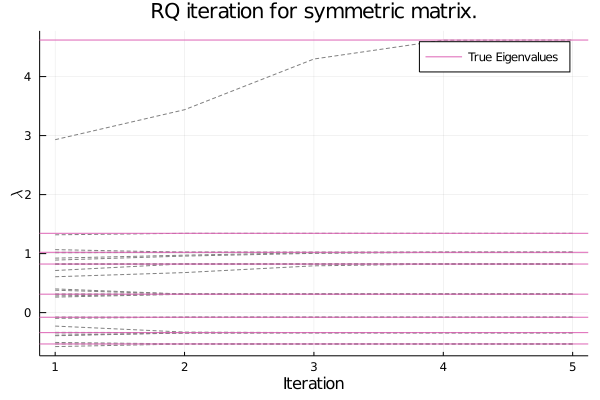

In [15]:
## Compare Accuracy for a bunch of trajectories
n_particles = 30
N = 5
b0 = randn(m, n_particles)

λ_est_RQ = test_RQ(n_particles, N, b0)
plot(λ_est_RQ, 
    label = false,
    color = "grey",
    xlabel = "Iteration",
    linestyle = :dash,
    ylabel = L"\lambda",
    title = "RQ iteration for symmetric matrix.")

λ_true = Float64[]
for i in 1:n_particles
   push!(λ_true, λ[argmin(norm.(λ .- λ_est_RQ[end,i]))]) 
end

λ_true = unique(λ_true)
hline!(λ_true, label = "True Eigenvalues")

As we can see, all the trajectories here appear to converge.

### Finding all eigenvalues 
Since our matrix $A$ is symmetric, we have that each of the eigenvectors is orthognal. Therefore, if we take a random intial condition that is orthogonal to our computed eigenvectors, we should be able to recover all eigenpairs for our symmetric matrix.

In [16]:
function make_ortho(v, U)
    # Make v orthogonal to the columns of U
    for j in 1:size(U)[2]
        v -= (v'U[:,j])*U[:,j]
    end
    return v
end

make_ortho (generic function with 1 method)

In [17]:
## Finding all eigenvalues
λ_est_RQ = Vector{Float64}(undef, m)

b0 = randn(m, n_particles)
b_est_RQ = zeros(size(b0))

for k in 1:m
    if k > 1
        b0[:,k] = make_ortho(b0[:,k], b_est_RQ[:,1:(k-1)])
    end
    
    b_est_RQ[:,k], λ_est_RQ[k] = RQ_iteration(A; N = 30,  b0 = b0[:,k])    
end

In [18]:
sort(λ)

10-element Array{Float64,1}:
 -1.6800656427316674
 -0.9191590715194204
 -0.5308755388182542
 -0.33861785431838265
 -0.07828772618704671
  0.31252728946949926
  0.8235198044307106
  1.0217652103428296
  1.3444050361757953
  4.618723034021535

In [19]:
sort(unique(λ_est_RQ))

10-element Array{Float64,1}:
 -1.6800656427316674
 -0.9191590715194211
 -0.5308755388182556
 -0.3386178543183826
 -0.07828772618704612
  0.3125272894695021
  0.8235198044307095
  1.0217652103428303
  1.3444050361757955
  4.61872303402153

As you can see, we get a good approximation of the ten eigenvalues.

## 1.d.

(d) Repeat (b) and (c) with a random matrix that is not symmetric. Be sure to plot the eigenvalue in the complex plane.

In [20]:
m = 10
A = rand(m, m)

10×10 Array{Float64,2}:
 0.154339   0.333071   0.981517   …  0.193283   0.866564   0.496649
 0.869518   0.0107051  0.132815      0.293323   0.0570672  0.699142
 0.19445    0.543343   0.819435      0.464475   0.0374114  0.103876
 0.240691   0.978751   0.880612      0.284034   0.0213579  0.0466809
 0.710356   0.874386   0.665828      0.0153399  0.778332   0.889806
 0.364215   0.700909   0.0596185  …  0.609779   0.903824   0.335408
 0.178123   0.943254   0.579229      0.77774    0.910207   0.254213
 0.441952   0.312813   0.619161      0.625955   0.177272   0.51392
 0.0207265  0.283847   0.149263      0.140373   0.489047   0.160928
 0.587849   0.584537   0.597274      0.944134   0.61317    0.504514

In [21]:
## Compute eigenvalues and vectors
λ, v = eigen(A)

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
10-element Array{Complex{Float64},1}:
  -1.0342256541140173 + 0.0im
   -0.796660361371527 + 0.0im
  -0.2739497568318909 + 0.0im
 -0.08285619180578956 + 0.0im
  0.16906286073227506 - 0.8074412188496758im
  0.16906286073227506 + 0.8074412188496758im
   0.2883740446863548 + 0.0im
   0.5769906924851592 + 0.0im
   0.9559021305750721 + 0.0im
   5.1380826180113655 + 0.0im
vectors:
10×10 Array{Complex{Float64},2}:
  -0.039043+0.0im    0.209119+0.0im  …  0.0863695+0.0im  0.214262+0.0im
  -0.510212+0.0im    0.371879+0.0im      0.102021+0.0im  0.299856+0.0im
  -0.116129+0.0im   0.0813384+0.0im      0.241893+0.0im  0.368346+0.0im
   0.553924+0.0im   -0.575966+0.0im      0.600414+0.0im  0.253851+0.0im
  -0.128313+0.0im    0.148664+0.0im      0.249869+0.0im  0.395733+0.0im
  -0.259706+0.0im    0.360234+0.0im  …  -0.273403+0.0im  0.352636+0.0im
   0.496781+0.0im   -0.418994+0.0im     -0.326999+0.0im  

### Power Iteration

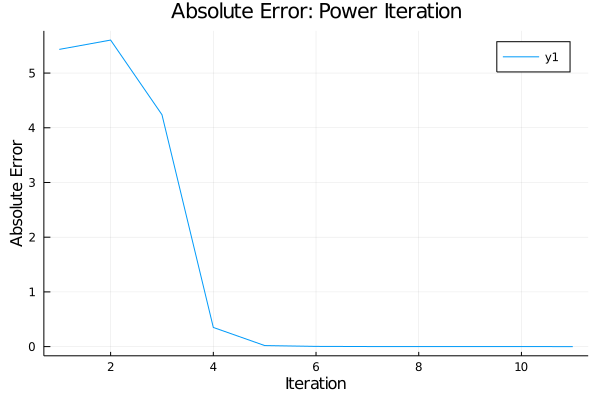

In [22]:
## Plot Accuracy Per Iteration
b_PI, λ_est_PI = power_iteration_save(A)

λ_max = λ[argmax(norm.(λ))]
error = norm.(λ_est_PI .- λ_max)

plot(error,
    xlabel = "Iteration",
    ylabel = "Absolute Error",
    title = "Absolute Error: Power Iteration")

### Rayleigh Iteration

In the case that our matrix is non-symmetric, it's possible to have complex eigenvalues. Therefore, in what follows, we'll sample random complex vectors as our initial "eigenvalue" guesses.

#### Visualizing Accuracy for non-symmetric matrices

In [23]:
## Visualizing Accuracy
n_particles = 100
N = 20
b0 = randn(m, n_particles) + randn(m, n_particles)*im

λ_est_RQ = test_RQ(n_particles, N, 50*b0)

error = Matrix{Float64}(undef, size(λ_est_RQ))
for i in 1:n_particles
    approached_val = λ[argmin(norm.(λ .- λ_est_RQ[end,i]))]
    
    for t in 1:N
        error[t, i] = norm(λ_est_RQ[t, i] - approached_val) 
    end
end

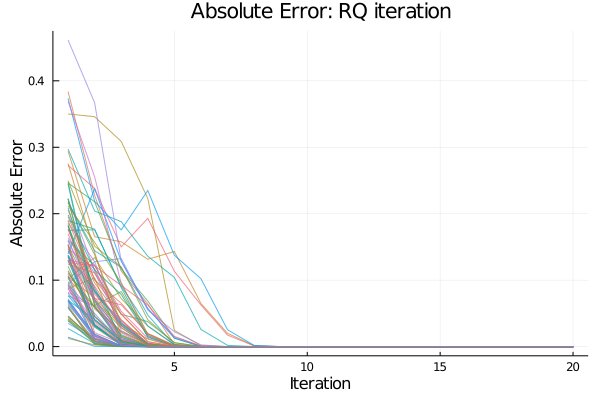

In [24]:
plot(error, 
    label = false, 
    xlabel = "Iteration",
    ylabel = "Absolute Error",
    title = "Absolute Error: RQ iteration",
    alpha = 0.7)

#### Finding all eigenvectors and eigenvectors
In the case of a non-symmetric matrix, we have no guarantee on the orthogonality of the eigenvalues, so it's a bit more difficult to get all eigenvalues with tailored guesses. Instead, we randomly sample initial eigenvector candidates.

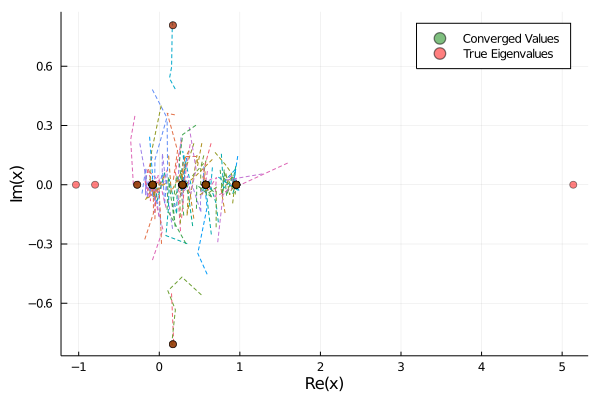

In [25]:
## Visualizing Convergence and Finding Eigenpairs
n_particles = 100
N = 10
b0 = randn(m, n_particles) + randn(m, n_particles)*im

λ_est_RQ = test_RQ(n_particles, N, 50*b0)

plot(λ_est_RQ, label = false, linestyle=:dash)
scatter!(λ_est_RQ[end,:], color = "Green", label = "Converged Values", alpha = 0.5)
scatter!(λ, color = "Red", label = "True Eigenvalues", alpha = 0.5)

Above, we can see that the various trajectories converge to eigenvalues, but not all eigenvalues are always found with this random sampling method. Hypothetically, you can just use a whole loop on the "achieved" eigenvalues like I did to loop until you converge on 10 unique values, but I am lazy.

# 2. Back to Yale Faces

Download the data set for CROPPED IMAGES.

(a) Power iterate on the matrix of images to find the dominant eigenvector and eigenvalue. Compare it to the leading order SVD mode.

(b) Use randomized sampling to reproduce the SVD matrices: $U$, $\Sigma$ and $V$.

(c) Compare the randomized modes to the true modes along with the singular value decay as a function of the number of randomized samples.

## Loading Data

In [26]:
using Images, Colors # Handling Images
using LaTeXStrings # Latex in plots

In [27]:
# Use readdir to get file names
CroppedDataDir = "../data/CroppedYale/"
YaleFolders = readdir(CroppedDataDir)[occursin.("yale", readdir(CroppedDataDir))]

# Loop over folders and read images
img_array = []
for folder in YaleFolders
    FolderDir = CroppedDataDir * folder
    FileNames = readdir(FolderDir)
    for file in FileNames 
        if occursin("pgm", file)
            push!(img_array, load(CroppedDataDir * folder * "/" * file))
        end
    end
end

In [28]:
# Save image sizes for conversion to image later
m,n = size(img_array[1])
test_img_vec = vec(img_array[1]);

In [29]:
# Covert greyscale images to column vector
img_array = vec.(img_array);

In [30]:
X = convert.(Float64, hcat(img_array...))

32256×2432 Array{Float64,2}:
 0.313725   0.368627   0.231373   …  0.0117647   0.0156863   0.0156863
 0.317647   0.341176   0.262745      0.0156863   0.0156863   0.0117647
 0.313725   0.345098   0.258824      0.00784314  0.0156863   0.0156863
 0.309804   0.341176   0.290196      0.0117647   0.0156863   0.0156863
 0.313725   0.345098   0.294118      0.0156863   0.0156863   0.0156863
 0.321569   0.337255   0.298039   …  0.0117647   0.0117647   0.0196078
 0.309804   0.364706   0.333333      0.0156863   0.0117647   0.0196078
 0.313725   0.360784   0.356863      0.0117647   0.0117647   0.0156863
 0.32549    0.352941   0.360784      0.0117647   0.0117647   0.0156863
 0.321569   0.34902    0.360784      0.0117647   0.0117647   0.0117647
 0.305882   0.341176   0.34902    …  0.0117647   0.0117647   0.0156863
 0.317647   0.337255   0.345098      0.0117647   0.0117647   0.0117647
 0.321569   0.34902    0.356863      0.00784314  0.0117647   0.0117647
 ⋮                                ⋱             

## 2.a.

(a) Power iterate on the matrix of images to find the dominant eigenvector and eigenvalue. Compare it to the leading order SVD mode.

In [31]:
b_face, λ_face = power_iteration(X' * X, N = 100)

([-0.03016995310684395, -0.031177667531729788, -0.029246671639916396, -0.004172942568444458, -0.027470201785291158, -0.021816401928517755, -0.03213289022583565, -0.030077074515572445, -0.03305742872383271, -0.027536426222544923  …  -0.012616046413563061, -0.018060790829487163, -0.01327915570539827, -0.014722224726738084, -0.010972871550767423, -0.011404859616031049, -0.007788026693713112, -0.009435191732917849, -0.009168283733205647, -0.006387026932858635], 7.550936495884137e6)

In [32]:
@time U, S, V = F = svd(X);

 21.355658 seconds (168.06 k allocations: 1.398 GiB, 0.70% gc time)


If the power iteration has converged to the largest eigenvalue, then the largest singular value will be approximately the square root of the result of the power iteration.

In [33]:
sqrt(λ_face) ≈ maximum(S)

true

## 2.b.

(b) Use randomized sampling to reproduce the SVD matrices: $U$, $\Sigma$ and $V$.

In [45]:
function randomized_svd(X, k; p = 0)
    n = size(X)[2]
    Ω = randn(n, k+p)
    F = qr(X*Ω)    
    Q = Matrix(F.Q)
    Usmall, Shat, Vhat = svd(Q'*X)
    Uhat = Q*Usmall
   
    return Uhat, Shat, Vhat
end

randomized_svd (generic function with 1 method)

In [46]:
k = 50
@time Uhat, Shat, Vhat = randomized_svd(X, k);

  0.328027 seconds (37.35 k allocations: 67.129 MiB)


We'll now plot the first column vector of $U$ for both the full SVD and randomized SVD.

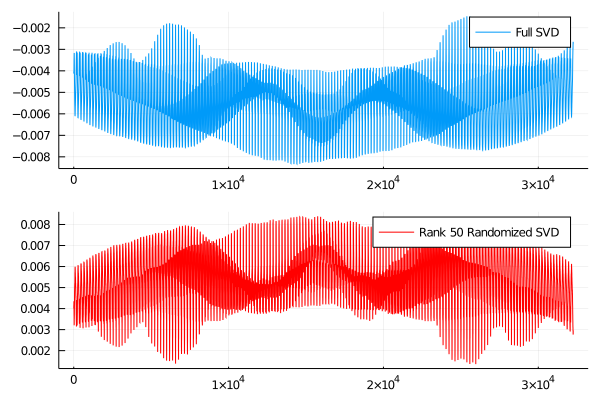

In [47]:
p_true = plot(U[:,1], label = "Full SVD")
p_approx = plot(Uhat[:,1], label = "Rank $(k) Randomized SVD", color = "red")
plot(p_true, p_approx, 
    layout = (2,1))

Notice that these look similar up to a factor of -1

## 2.c.

(c) Compare the randomized modes to the true modes along with the singular value decay as a function of the number of randomized samples.

### Plotting Singular Value Decay

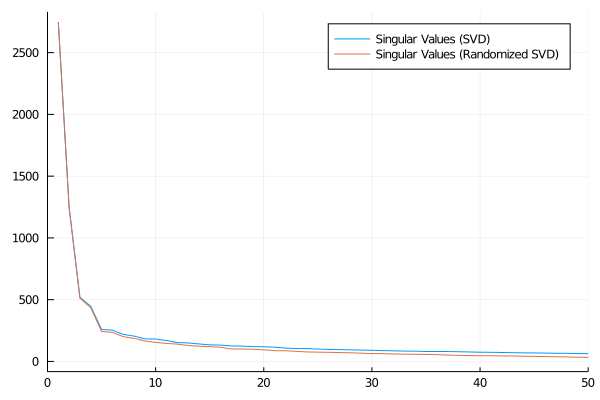

In [37]:
## Plot Singular Value Decay
plot(S, label = "Singular Values (SVD)", xlim = (0, k))
plot!(Shat, label = "Singular Values (Randomized SVD)")

As expected $\Sigma$ and the singular value decay are nearly identical between the full SVD and the low rank SVD.

## Comparing eigenfaces

In [38]:
# Convert column vector to face matrix
function vec_to_face(v, m,n)
    return reshape(v,m,n) 
end

vec_to_face (generic function with 1 method)

We'll now plot the first 4 column vectors for both the full and randomized SVD.

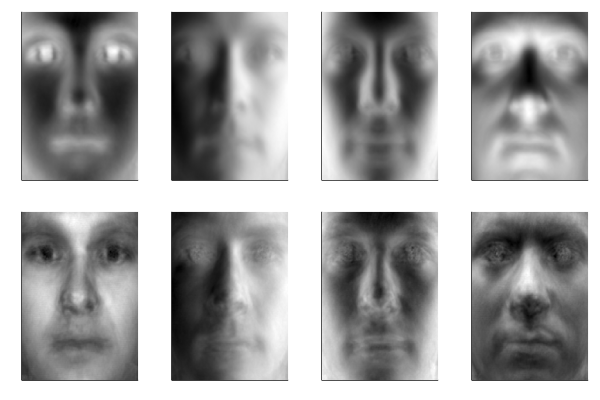

In [39]:
topN = 4

orig_plot = []
rand_plot = []

for i in 1:topN
    orig_face = vec_to_face(U[:,i], m, n)

    push!(orig_plot,
        heatmap(orig_face, color = :greys, yflip=true, axis = nothing, legend=false)
        )
    
    rand_face = vec_to_face(Uhat[:,i], m, n)

    push!(rand_plot,
        heatmap(rand_face, color = :greys, yflip=true, axis = nothing, legend=false)
        ) 
end

plot(orig_plot..., rand_plot..., layout = (2, topN))

As you can see, these faces are pretty similar between the full SVD and the rSVD (up to a sign change).

### Comparing Various Ranks

In [40]:
## Visualizing top eigen face for various ranks k
kRange = [1 5 25 50 100]

full_plot = []
k_plot = []

orig_face = vec_to_face(U[:,1], m, n)

push!(full_plot,
        heatmap(orig_face, color = :greys, yflip=true, axis = nothing, legend=false, title = "Full SVD")
        )

for k in kRange
    
    Uhatk, __, __ = randomized_svd(X, k);
    k_face = vec_to_face(Uhatk[:,1], m, n)

    push!(k_plot,
        heatmap(k_face, color = :greys, yflip=true, axis = nothing, legend=false, title = "rSVD. k = $k")
        ) 
end

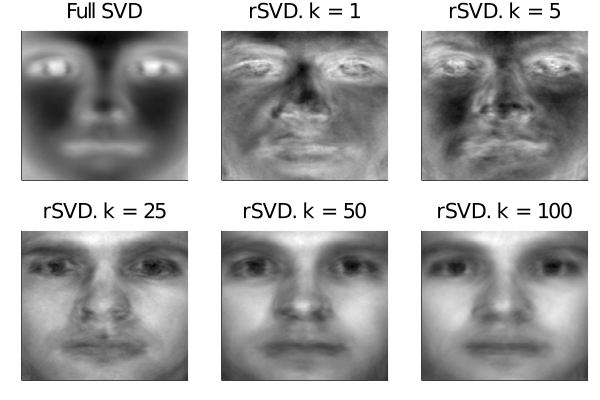

In [41]:
plot(full_plot..., k_plot...)

As you can see, the svd becomes a better approximation of the first column vector $u_1$ as the rank of the rSVD increases (up to a sign change).